# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t60_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,140.123212,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
0,337.0,473.0,498.0,623.0,636.0,777.0,640.0,775.0,895.0,836.0,...,1361.0,1336.0,1381.0,1421.0,1377.0,1388.0,1341.0,1395.0,1332.0,1444.0
1,396.0,535.0,603.0,565.0,604.0,832.0,703.0,879.0,860.0,841.0,...,1308.0,1424.0,1422.0,1385.0,1440.0,1367.0,1422.0,1493.0,1308.0,1431.0
2,429.0,494.0,557.0,575.0,614.0,715.0,680.0,721.0,856.0,893.0,...,1367.0,1410.0,1470.0,1351.0,1418.0,1317.0,1356.0,1389.0,1366.0,1451.0
3,402.0,469.0,554.0,517.0,651.0,732.0,625.0,718.0,815.0,850.0,...,1413.0,1355.0,1322.0,1424.0,1443.0,1409.0,1448.0,1432.0,1335.0,1442.0
4,427.0,453.0,608.0,558.0,673.0,734.0,739.0,803.0,815.0,889.0,...,1495.0,1452.0,1429.0,1422.0,1402.0,1492.0,1460.0,1539.0,1387.0,1473.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,374.0,388.0,546.0,486.0,564.0,618.0,674.0,680.0,685.0,710.0,...,1079.0,1147.0,1046.0,1112.0,1156.0,1110.0,1122.0,1114.0,1136.0,1186.0
697,414.0,407.0,537.0,521.0,565.0,729.0,616.0,691.0,665.0,792.0,...,1185.0,1058.0,1046.0,1106.0,1116.0,1188.0,1046.0,1169.0,1180.0,1162.0
698,341.0,459.0,621.0,515.0,609.0,701.0,716.0,747.0,706.0,877.0,...,1102.0,1170.0,1128.0,1162.0,1150.0,1191.0,1133.0,1257.0,1209.0,1207.0
699,366.0,471.0,564.0,517.0,568.0,708.0,680.0,675.0,795.0,831.0,...,1169.0,1145.0,1106.0,1133.0,1227.0,1235.0,1147.0,1154.0,1247.0,1174.0


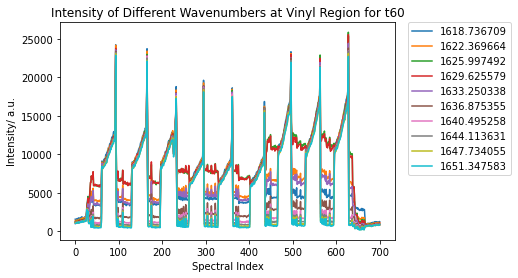

In [7]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t60')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [8]:
# df.loc[:,'1629.625579'] --> When using loc.
df.columns.get_loc('1629.625579') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.625579'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

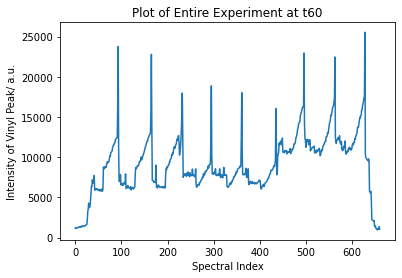

In [9]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:660,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t60')
plt.show()

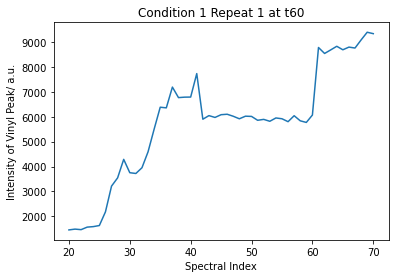

In [14]:
# Condition
df.loc[20:70,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 1 at t60')
plt.show()

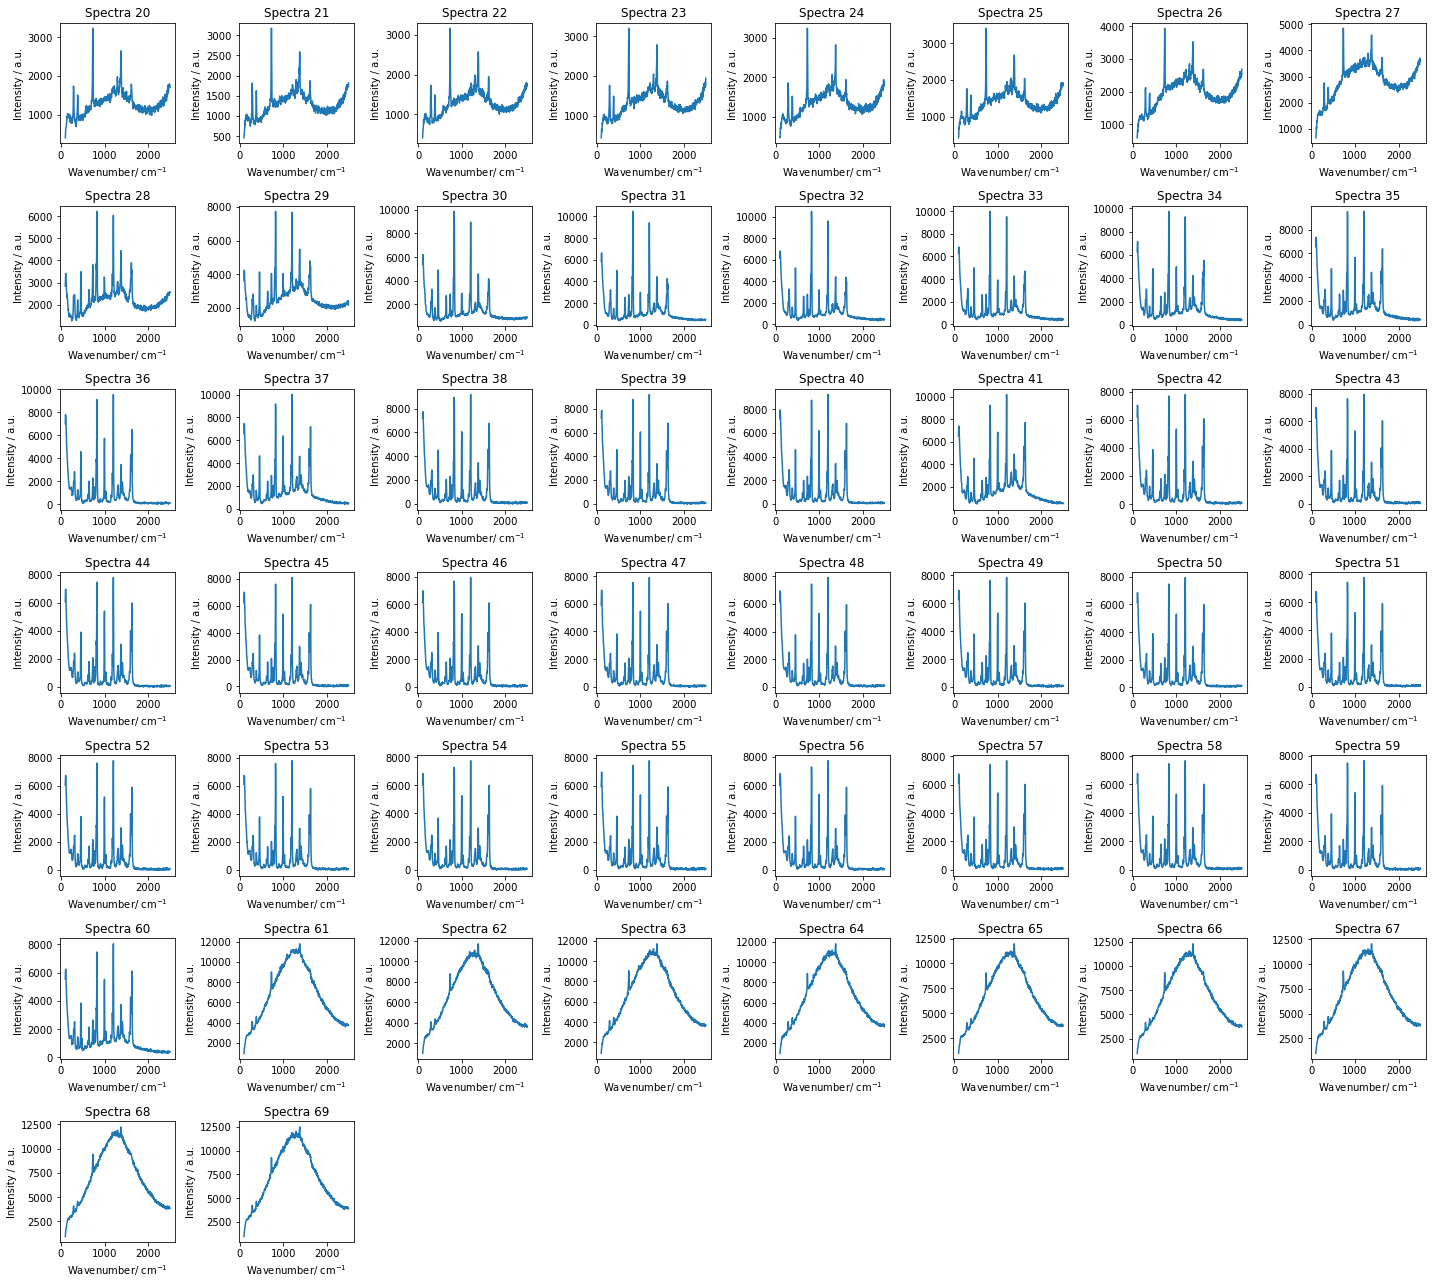

In [15]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(20, 70):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-19))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [16]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = df.loc[46:55, :]
condition1_ss.insert(loc = 0, column = 'Condition', value = 'C1_R1')
condition1_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
46,C1_R1,6152.0,6682.0,6973.0,6411.0,5979.0,5600.0,4781.0,4431.0,4327.0,...,82.0,66.0,41.0,72.0,103.0,91.0,97.0,61.0,38.0,67.0
47,C1_R1,5905.0,6685.0,6982.0,6637.0,5899.0,5448.0,4798.0,4293.0,4086.0,...,21.0,37.0,71.0,63.0,90.0,104.0,84.0,47.0,79.0,104.0
48,C1_R1,6160.0,6755.0,6951.0,6411.0,5828.0,5404.0,4894.0,4524.0,4116.0,...,70.0,56.0,69.0,74.0,134.0,109.0,30.0,103.0,31.0,65.0
49,C1_R1,6279.0,6740.0,6922.0,6602.0,5940.0,5403.0,4795.0,4327.0,4010.0,...,79.0,96.0,62.0,52.0,112.0,95.0,89.0,125.0,43.0,91.0
50,C1_R1,6151.0,6855.0,6820.0,6528.0,5928.0,5476.0,4802.0,4296.0,4064.0,...,50.0,87.0,66.0,82.0,128.0,99.0,54.0,97.0,71.0,132.0
51,C1_R1,6021.0,6738.0,6768.0,6453.0,5840.0,5190.0,4699.0,4518.0,4050.0,...,39.0,71.0,35.0,89.0,59.0,133.0,65.0,77.0,26.0,125.0
52,C1_R1,6058.0,6555.0,6743.0,6256.0,5780.0,5241.0,4812.0,4480.0,4038.0,...,52.0,10.0,94.0,86.0,90.0,62.0,67.0,73.0,25.0,103.0
53,C1_R1,6116.0,6754.0,6700.0,6592.0,5764.0,5323.0,4735.0,4247.0,4002.0,...,36.0,62.0,75.0,51.0,49.0,74.0,71.0,60.0,20.0,85.0
54,C1_R1,6042.0,6598.0,6825.0,6483.0,5716.0,5319.0,4677.0,4349.0,3970.0,...,40.0,78.0,56.0,81.0,118.0,130.0,89.0,78.0,69.0,63.0
55,C1_R1,5948.0,6540.0,6976.0,6175.0,5979.0,5251.0,4518.0,4321.0,4068.0,...,60.0,-5.0,63.0,47.0,112.0,59.0,82.0,69.0,24.0,59.0


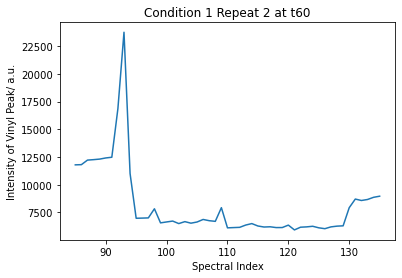

In [18]:
# Condition
df.loc[85:135,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 2 at t60')
plt.show()

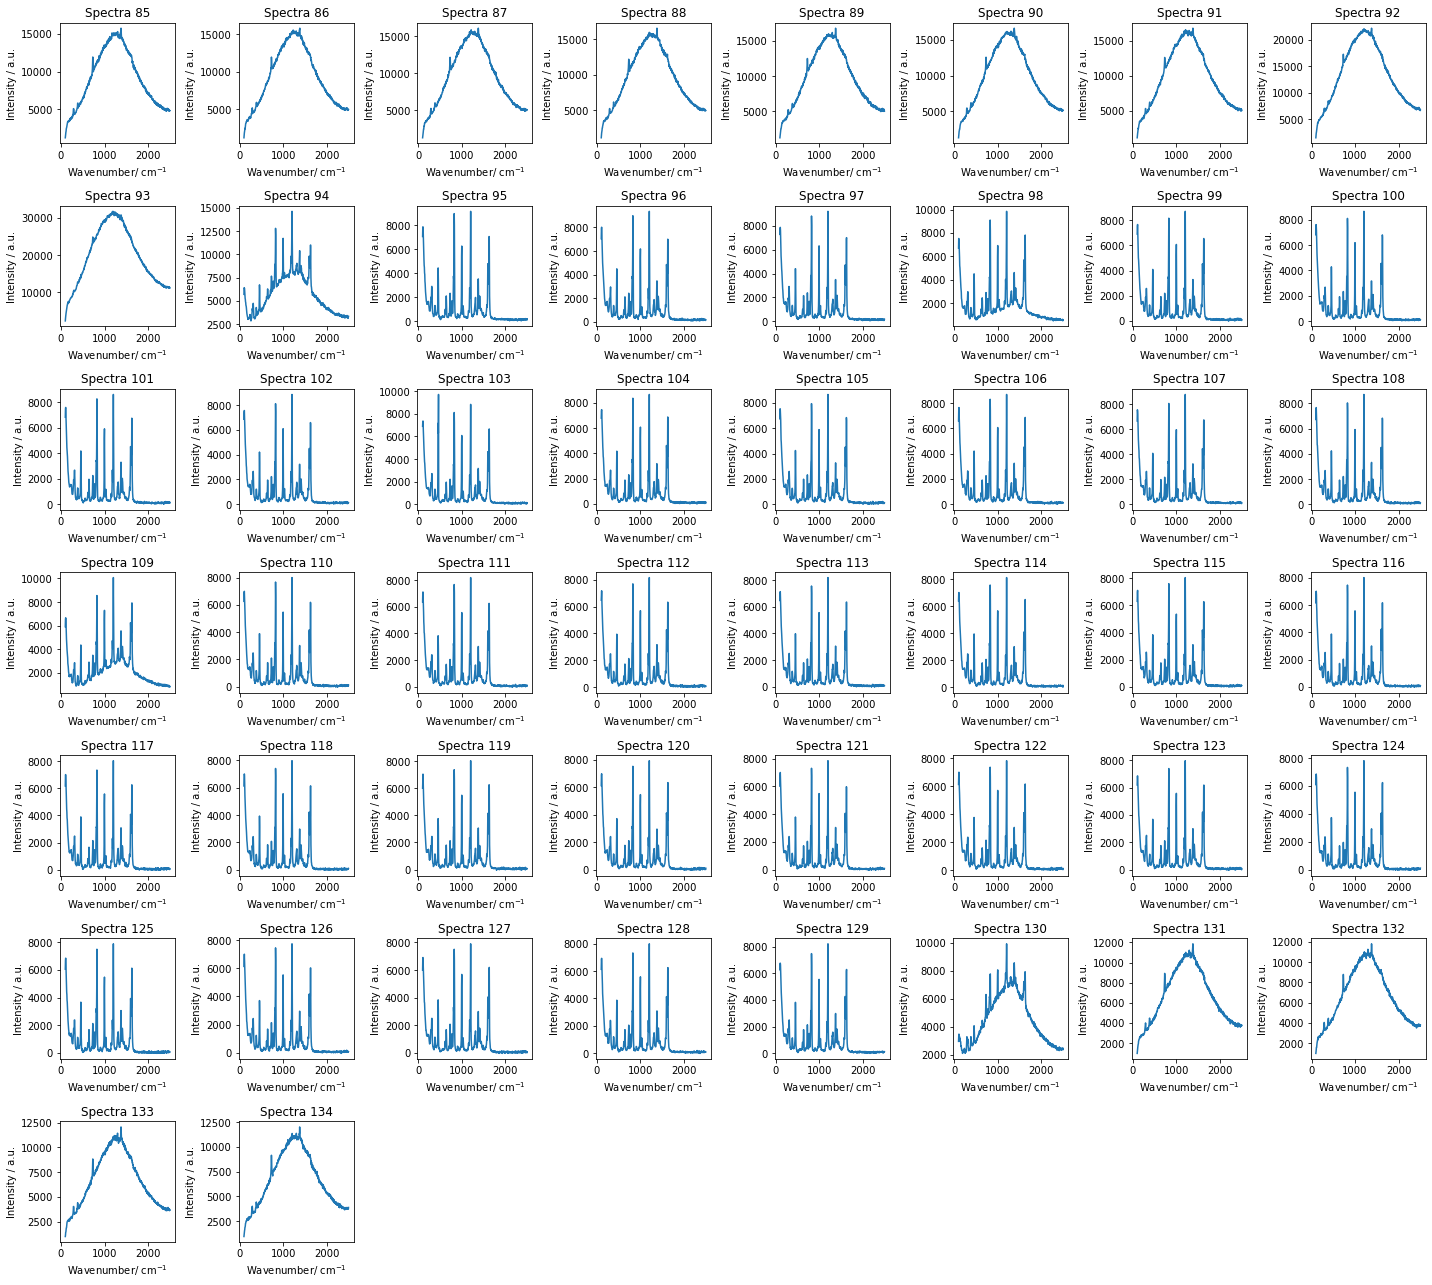

In [19]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(85, 135):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-84))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [20]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = df.loc[116:125, :]
condition2_ss.insert(loc = 0, column = 'Condition', value = 'C1_R2')
condition2_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
116,C1_R2,6177.0,6991.0,7022.0,6752.0,5912.0,5558.0,4885.0,4635.0,4275.0,...,49.0,75.0,90.0,120.0,87.0,114.0,31.0,111.0,41.0,93.0
117,C1_R2,6167.0,6992.0,7005.0,6591.0,6061.0,5466.0,4773.0,4469.0,4238.0,...,57.0,68.0,75.0,47.0,108.0,64.0,81.0,102.0,16.0,56.0
118,C1_R2,6119.0,6726.0,6996.0,6817.0,5882.0,5389.0,4916.0,4481.0,4197.0,...,42.0,84.0,89.0,73.0,75.0,38.0,103.0,58.0,77.0,106.0
119,C1_R2,6005.0,6676.0,7039.0,6458.0,5928.0,5425.0,4859.0,4528.0,4056.0,...,87.0,41.0,69.0,58.0,84.0,88.0,82.0,83.0,34.0,66.0
120,C1_R2,6133.0,6867.0,6991.0,6495.0,6022.0,5422.0,5023.0,4453.0,4081.0,...,122.0,30.0,97.0,67.0,96.0,92.0,84.0,48.0,31.0,129.0
121,C1_R2,6025.0,6743.0,7007.0,6541.0,6012.0,5477.0,4771.0,4422.0,4062.0,...,39.0,29.0,85.0,26.0,73.0,79.0,64.0,41.0,35.0,92.0
122,C1_R2,6136.0,6771.0,7007.0,6388.0,5856.0,5521.0,4786.0,4446.0,4196.0,...,78.0,61.0,91.0,82.0,117.0,101.0,99.0,54.0,33.0,113.0
123,C1_R2,6197.0,6828.0,6863.0,6461.0,5803.0,5453.0,4903.0,4554.0,3966.0,...,79.0,71.0,40.0,85.0,120.0,96.0,101.0,41.0,-2.0,82.0
124,C1_R2,6102.0,6745.0,6858.0,6617.0,5746.0,5350.0,4706.0,4448.0,4074.0,...,51.0,41.0,83.0,75.0,63.0,84.0,40.0,76.0,45.0,124.0
125,C1_R2,6044.0,6701.0,6842.0,6464.0,5924.0,5357.0,4766.0,4392.0,4214.0,...,121.0,52.0,74.0,103.0,81.0,113.0,82.0,42.0,31.0,69.0


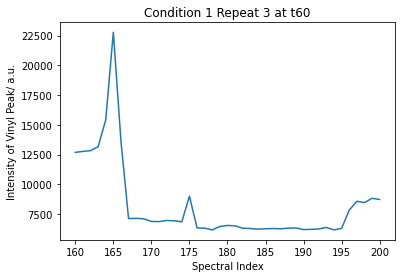

In [22]:
# Condition
df.loc[160:200,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 Repeat 3 at t60')
plt.show()

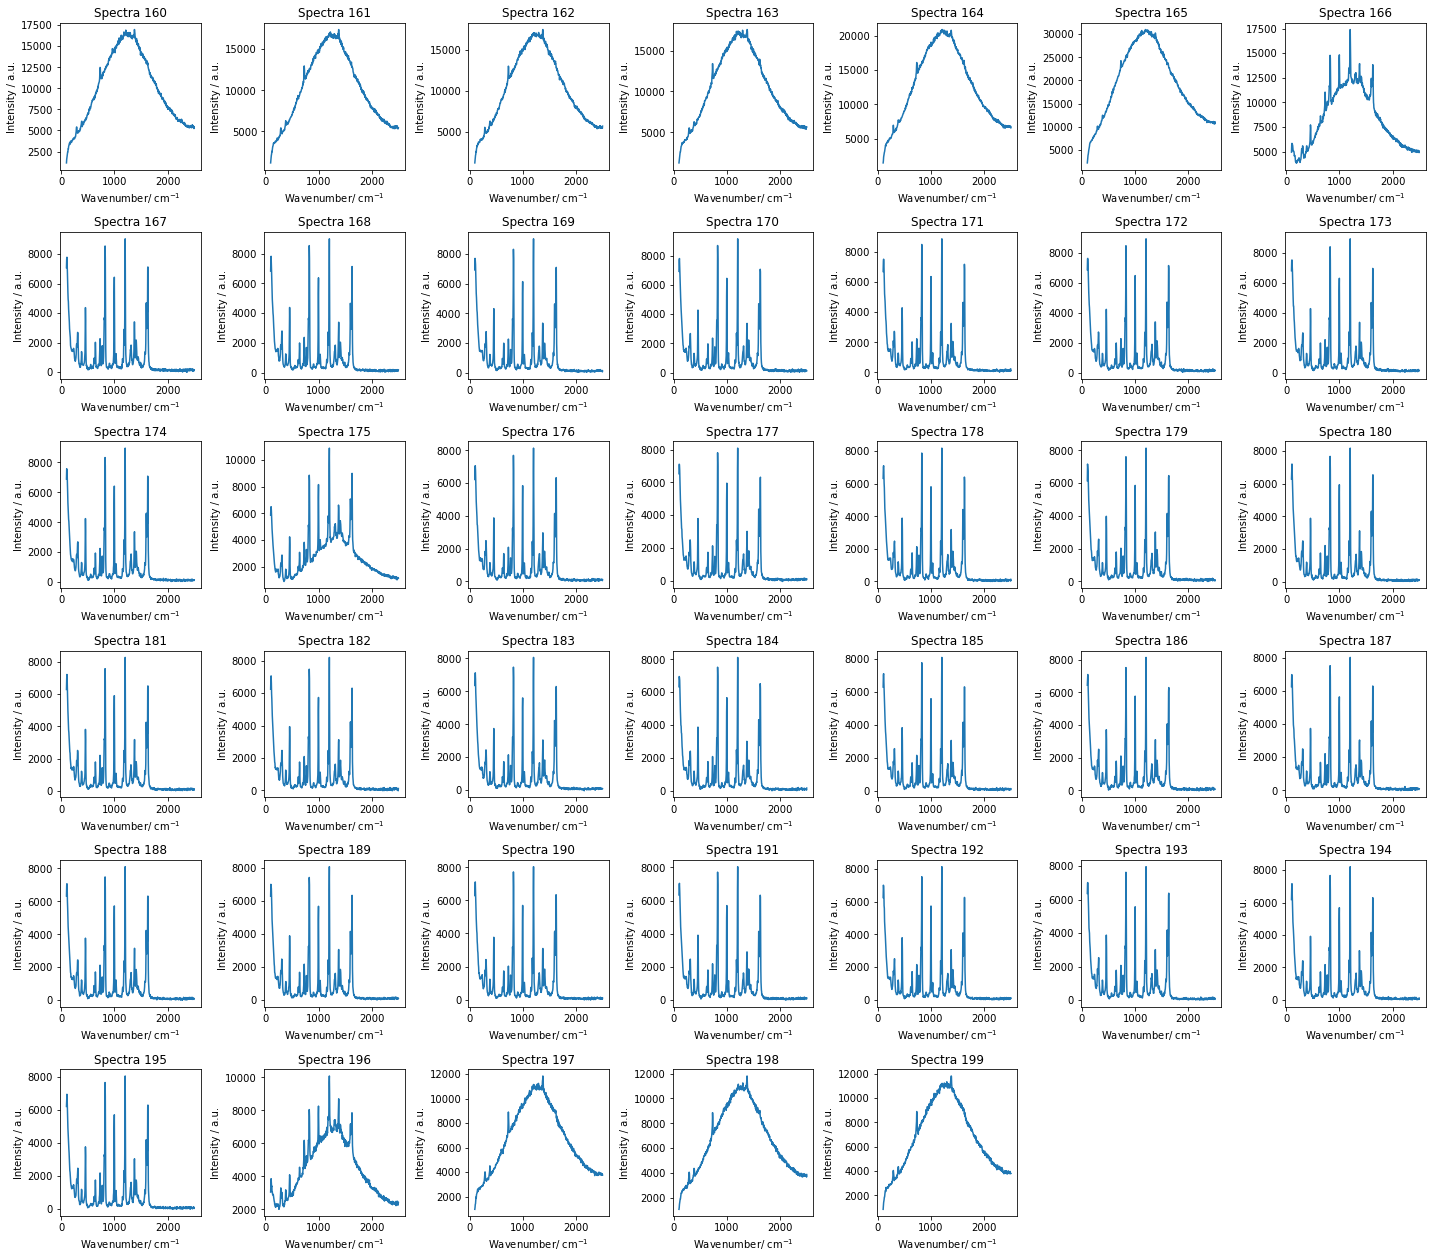

In [23]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(160, 200):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(7,7,(i-159))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [24]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = df.loc[183:192, :]
condition3_ss.insert(loc = 0, column = 'Condition', value = 'C1_R3')
condition3_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
183,C1_R3,6354.0,6759.0,7119.0,6737.0,5925.0,5490.0,5000.0,4433.0,4133.0,...,65.0,89.0,88.0,74.0,116.0,91.0,69.0,59.0,65.0,79.0
184,C1_R3,6329.0,6950.0,6895.0,6719.0,6055.0,5692.0,4831.0,4417.0,3989.0,...,71.0,61.0,91.0,94.0,80.0,115.0,116.0,57.0,27.0,153.0
185,C1_R3,6275.0,6992.0,7086.0,6574.0,6170.0,5478.0,4876.0,4450.0,4253.0,...,73.0,47.0,100.0,96.0,109.0,99.0,123.0,79.0,54.0,125.0
186,C1_R3,6429.0,6827.0,7083.0,6545.0,6212.0,5473.0,4959.0,4400.0,4134.0,...,61.0,10.0,54.0,45.0,126.0,65.0,71.0,64.0,48.0,55.0
187,C1_R3,6245.0,6971.0,6955.0,6612.0,5968.0,5449.0,5019.0,4456.0,3946.0,...,102.0,47.0,119.0,93.0,102.0,101.0,57.0,48.0,44.0,77.0
188,C1_R3,6320.0,6953.0,7065.0,6797.0,6011.0,5590.0,4906.0,4471.0,4192.0,...,87.0,82.0,103.0,99.0,125.0,107.0,97.0,62.0,41.0,90.0
189,C1_R3,6281.0,6997.0,6872.0,6752.0,5997.0,5561.0,4855.0,4543.0,4124.0,...,49.0,102.0,63.0,137.0,92.0,103.0,81.0,106.0,57.0,80.0
190,C1_R3,6292.0,6812.0,7115.0,6520.0,5938.0,5542.0,4877.0,4532.0,4171.0,...,72.0,72.0,36.0,67.0,86.0,120.0,31.0,62.0,27.0,89.0
191,C1_R3,6338.0,6969.0,7038.0,6621.0,5991.0,5650.0,5014.0,4426.0,4144.0,...,70.0,78.0,107.0,132.0,137.0,128.0,132.0,93.0,51.0,121.0
192,C1_R3,6254.0,7008.0,6948.0,6584.0,5756.0,5586.0,4790.0,4419.0,4190.0,...,78.0,101.0,114.0,54.0,64.0,108.0,65.0,96.0,65.0,107.0


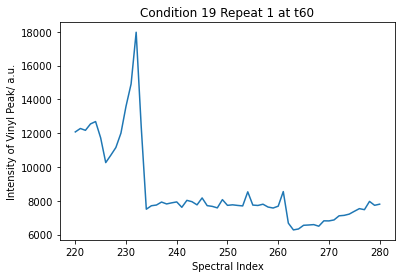

In [26]:
# Condition
df.loc[220:280,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 1 at t60')
plt.show()

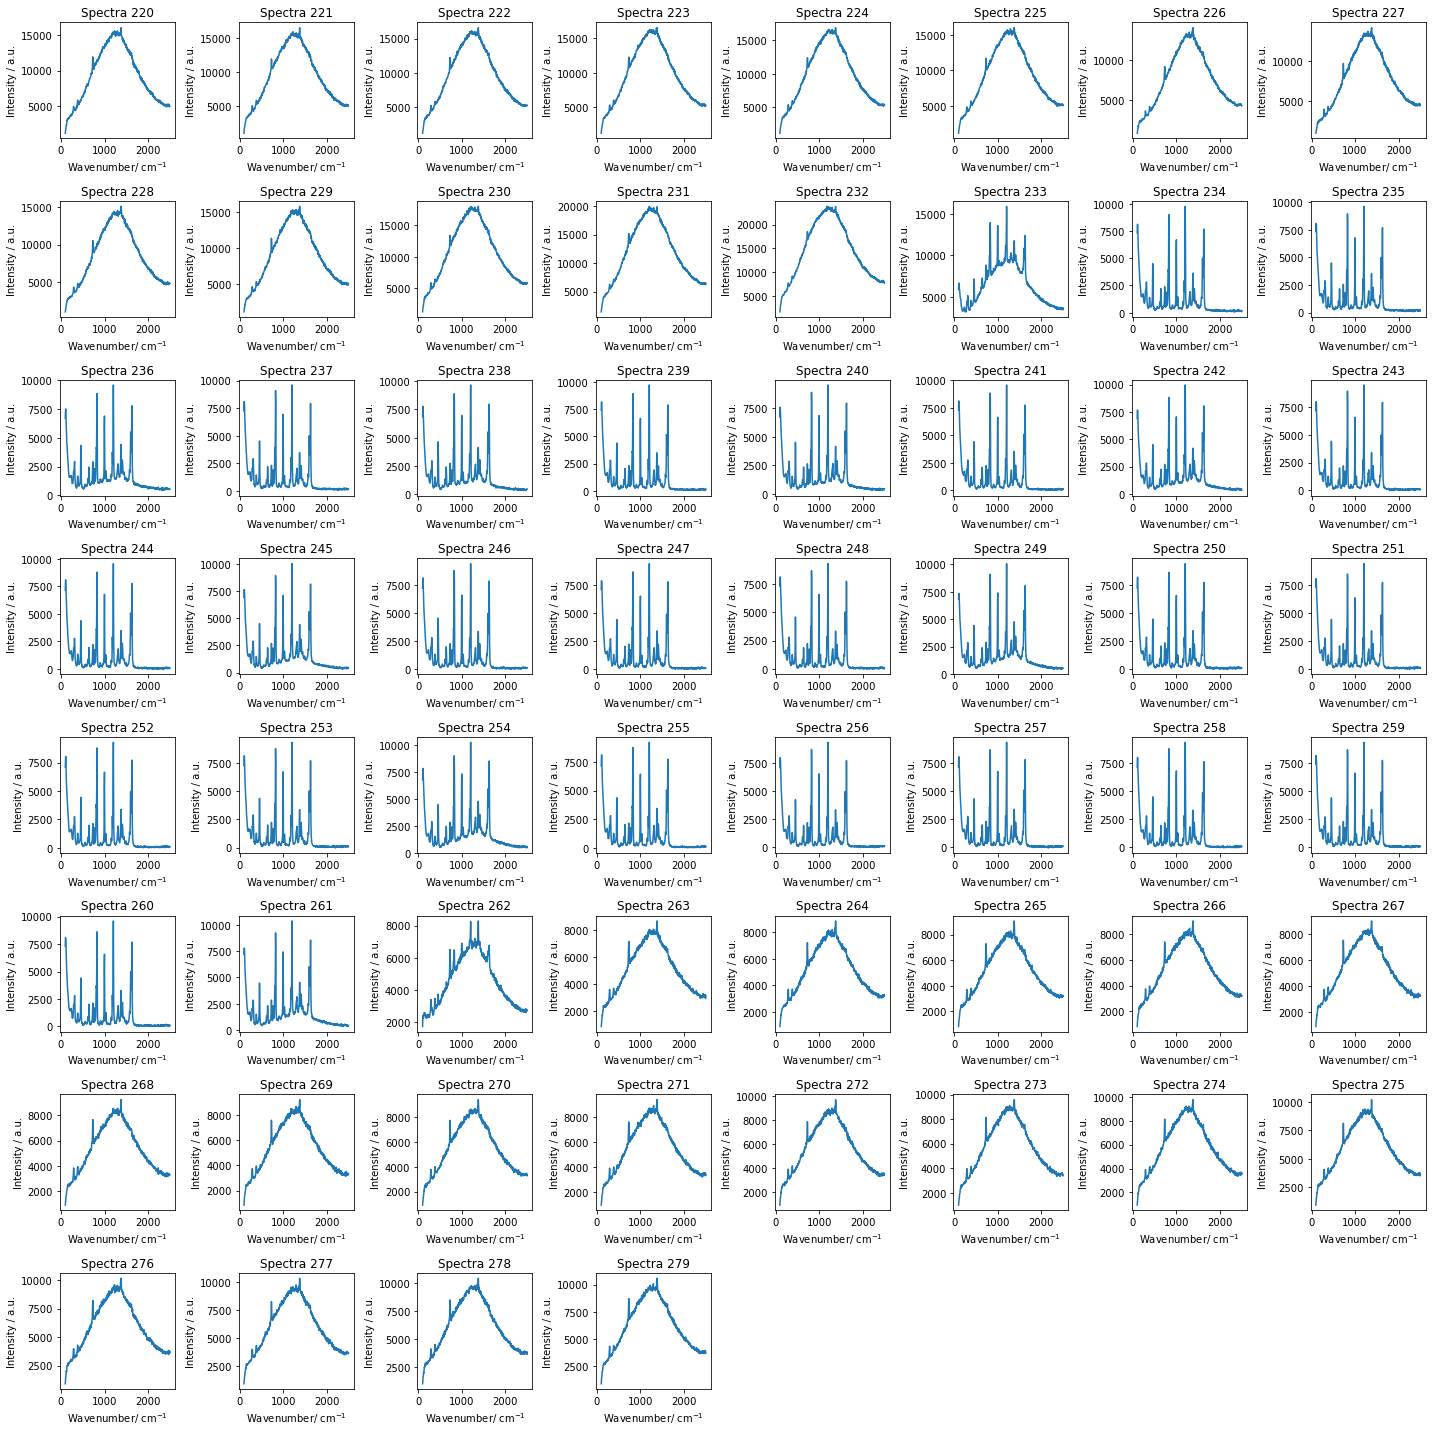

In [27]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(220, 280):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-219))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [57]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = df.loc[255:260, :]
condition4_ss.insert(loc = 0, column = 'Condition', value ='C19_R1')
condition4_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
255,C19_R1,7171.0,7838.0,8116.0,7599.0,6962.0,6310.0,5552.0,5227.0,4839.0,...,53.0,117.0,73.0,141.0,154.0,101.0,76.0,101.0,58.0,133.0
256,C19_R1,7122.0,7878.0,8027.0,7738.0,6967.0,6469.0,5690.0,5094.0,4798.0,...,66.0,74.0,82.0,74.0,120.0,89.0,104.0,77.0,48.0,136.0
257,C19_R1,7121.0,8058.0,8026.0,7656.0,7002.0,6182.0,5654.0,5099.0,4865.0,...,90.0,71.0,129.0,73.0,125.0,96.0,98.0,82.0,73.0,96.0
258,C19_R1,7144.0,7855.0,8004.0,7719.0,6741.0,6403.0,5629.0,5195.0,4793.0,...,47.0,58.0,57.0,110.0,111.0,142.0,84.0,109.0,62.0,66.0
259,C19_R1,7425.0,8173.0,8049.0,7670.0,7033.0,6329.0,5620.0,5245.0,4730.0,...,95.0,46.0,104.0,105.0,134.0,80.0,80.0,55.0,74.0,63.0
260,C19_R1,7318.0,8077.0,8002.0,7676.0,6891.0,6350.0,5702.0,5134.0,4784.0,...,59.0,56.0,110.0,113.0,112.0,112.0,112.0,82.0,12.0,83.0


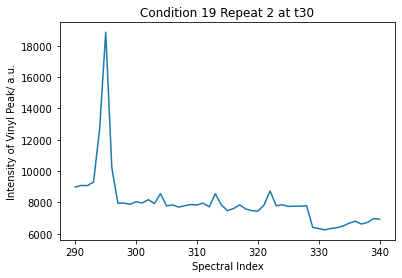

In [30]:
# Condition
df.loc[290:340,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 2 at t30')
plt.show()

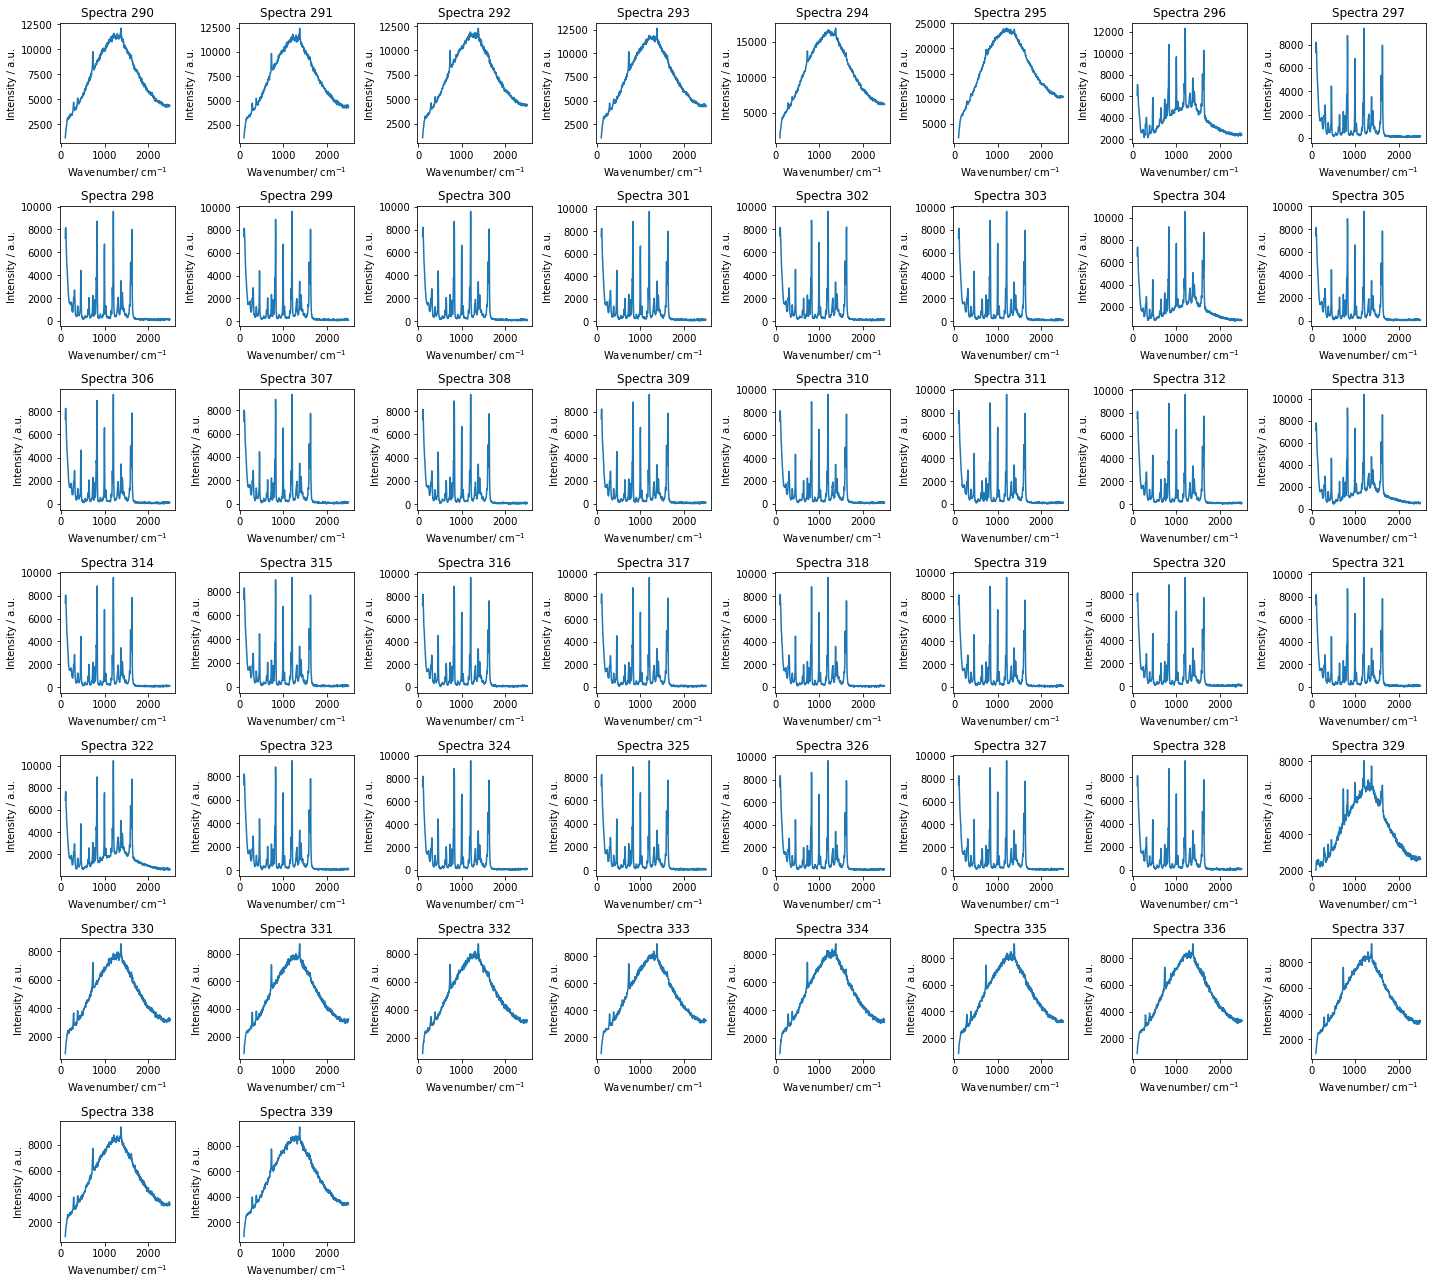

In [31]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(290, 340):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-289))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [32]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = df.loc[314:321, :]
condition5_ss.insert(loc = 0, column = 'Condition', value = 'C19_R2')
condition5_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
314,C19_R2,7383.0,7991.0,8072.0,7665.0,7014.0,6543.0,5666.0,5266.0,4869.0,...,106.0,75.0,62.0,135.0,82.0,76.0,128.0,107.0,90.0,112.0
315,C19_R2,7337.0,8081.0,8310.0,7630.0,6975.0,6461.0,5757.0,5110.0,4784.0,...,48.0,81.0,52.0,78.0,145.0,92.0,67.0,97.0,66.0,75.0
316,C19_R2,7184.0,8122.0,8185.0,7646.0,7045.0,6354.0,5557.0,5319.0,4989.0,...,102.0,100.0,117.0,125.0,130.0,123.0,78.0,127.0,56.0,113.0
317,C19_R2,7427.0,8140.0,8222.0,7669.0,6862.0,6565.0,5690.0,5197.0,4708.0,...,78.0,97.0,68.0,126.0,82.0,136.0,90.0,106.0,37.0,128.0
318,C19_R2,7267.0,8021.0,8141.0,7586.0,6928.0,6311.0,5588.0,5014.0,4796.0,...,74.0,90.0,73.0,72.0,54.0,132.0,54.0,104.0,75.0,126.0
319,C19_R2,7225.0,8050.0,7987.0,7618.0,6934.0,6466.0,5630.0,5131.0,4742.0,...,63.0,43.0,74.0,104.0,93.0,70.0,105.0,116.0,49.0,79.0
320,C19_R2,7412.0,8029.0,8128.0,7618.0,6981.0,6372.0,5851.0,5130.0,4887.0,...,57.0,31.0,91.0,92.0,116.0,84.0,94.0,114.0,22.0,96.0
321,C19_R2,7298.0,7996.0,8183.0,7751.0,6862.0,6212.0,5765.0,5070.0,4818.0,...,53.0,58.0,20.0,35.0,99.0,97.0,80.0,103.0,86.0,70.0


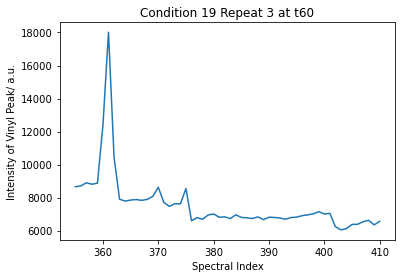

In [63]:
# Condition
df.loc[355:410,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 19 Repeat 3 at t60')
plt.show()

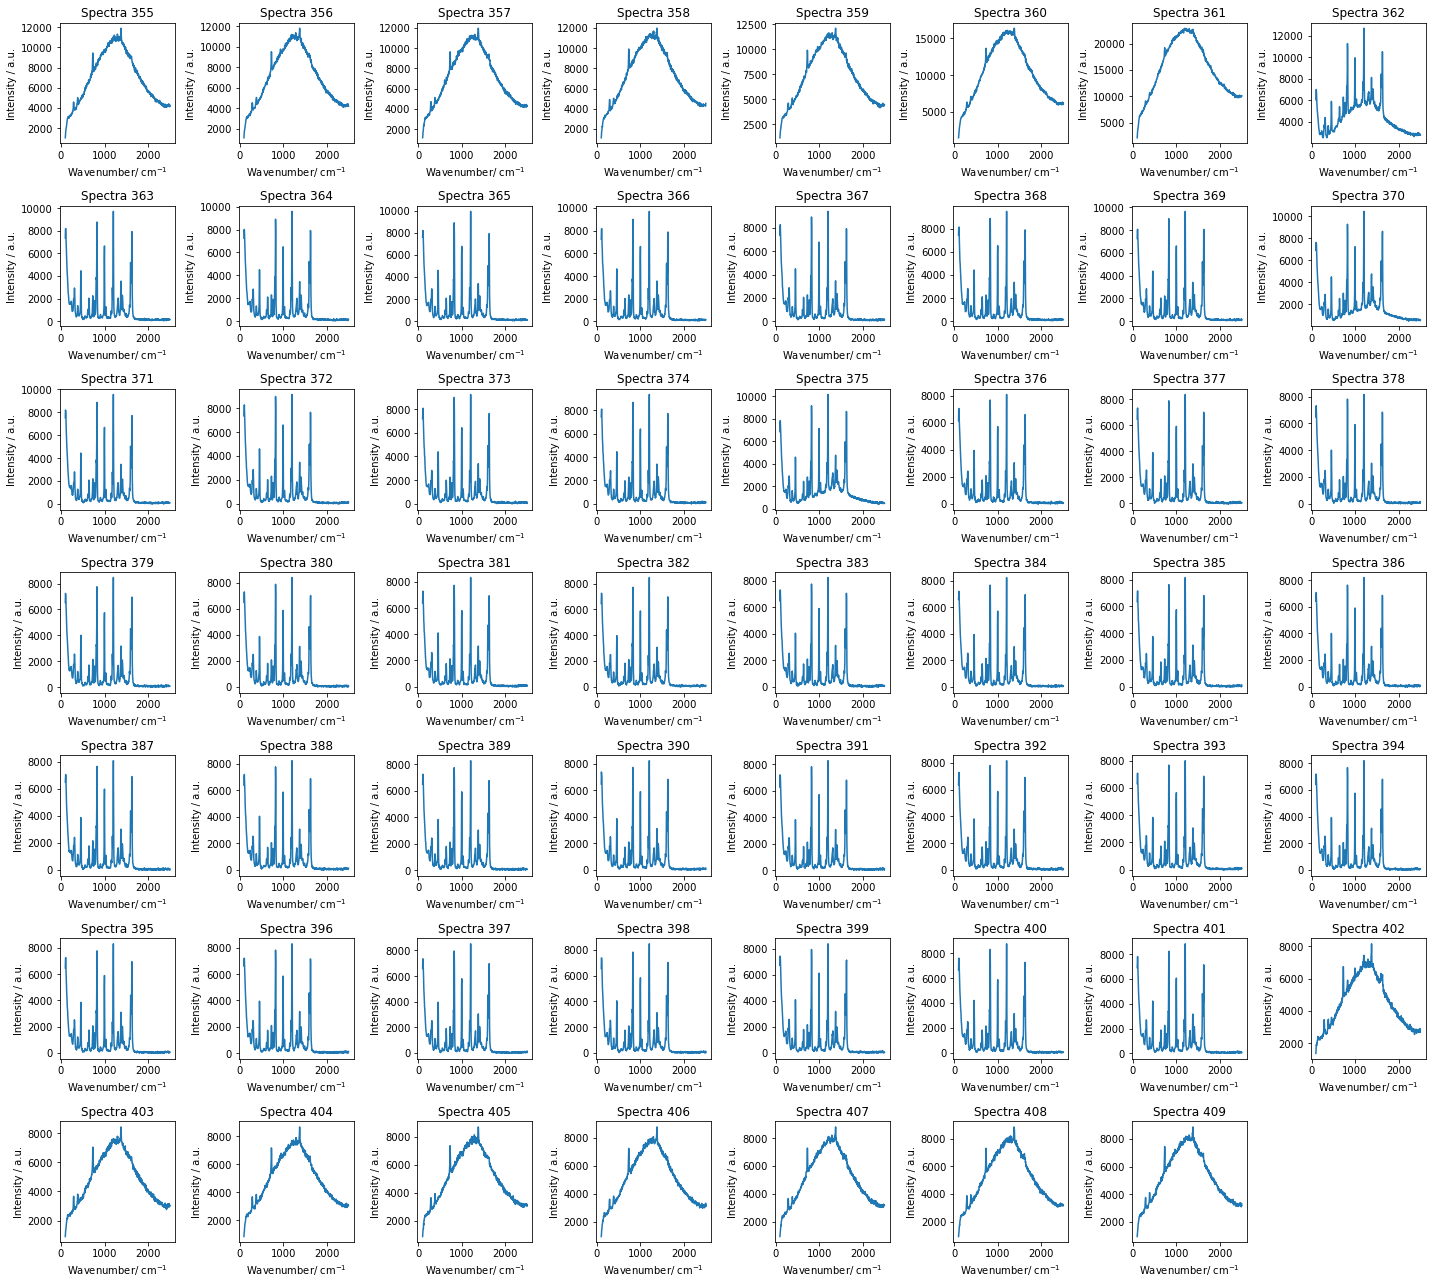

In [35]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(355, 410):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-354))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [36]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = df.loc[386:395, :]
condition6_ss.insert(loc = 0, column = 'Condition', value = 'C19_R3')
condition6_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
386,C19_R3,6415.0,6919.0,7068.0,6574.0,6268.0,5485.0,4851.0,4606.0,4190.0,...,59.0,65.0,70.0,-18.0,82.0,67.0,48.0,81.0,52.0,82.0
387,C19_R3,6512.0,6857.0,7072.0,6835.0,6114.0,5546.0,5018.0,4576.0,4259.0,...,34.0,48.0,68.0,47.0,83.0,77.0,62.0,54.0,-23.0,75.0
388,C19_R3,6371.0,7024.0,7175.0,6748.0,6150.0,5788.0,4962.0,4664.0,4174.0,...,49.0,87.0,98.0,120.0,87.0,63.0,39.0,70.0,50.0,118.0
389,C19_R3,6510.0,7155.0,7259.0,6862.0,6222.0,5735.0,5100.0,4592.0,4235.0,...,108.0,66.0,116.0,65.0,94.0,100.0,55.0,52.0,39.0,49.0
390,C19_R3,6468.0,7378.0,7193.0,6927.0,6200.0,5610.0,5003.0,4721.0,4356.0,...,80.0,57.0,96.0,86.0,111.0,132.0,67.0,68.0,25.0,113.0
391,C19_R3,6285.0,7214.0,7195.0,6651.0,6206.0,5581.0,5126.0,4756.0,4138.0,...,73.0,88.0,74.0,98.0,108.0,145.0,47.0,124.0,4.0,86.0
392,C19_R3,6369.0,7144.0,7289.0,6834.0,6140.0,5600.0,4891.0,4660.0,4356.0,...,55.0,32.0,87.0,24.0,107.0,93.0,85.0,-9.0,-1.0,97.0
393,C19_R3,6305.0,6965.0,7069.0,6663.0,6091.0,5506.0,4974.0,4692.0,4349.0,...,52.0,80.0,79.0,49.0,68.0,87.0,78.0,95.0,42.0,97.0
394,C19_R3,6407.0,7184.0,7152.0,6675.0,6331.0,5562.0,5025.0,4732.0,4406.0,...,62.0,26.0,1.0,74.0,72.0,67.0,48.0,87.0,32.0,74.0
395,C19_R3,6478.0,7101.0,7263.0,6802.0,6114.0,5562.0,5015.0,4666.0,4238.0,...,18.0,1.0,81.0,38.0,107.0,69.0,25.0,63.0,32.0,62.0


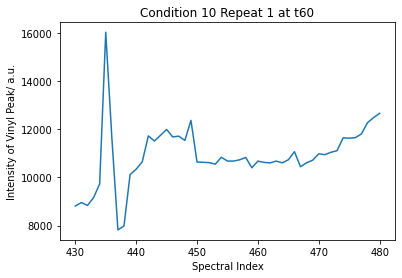

In [62]:
# Condition
df.loc[430:480,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 1 at t60')
plt.show()

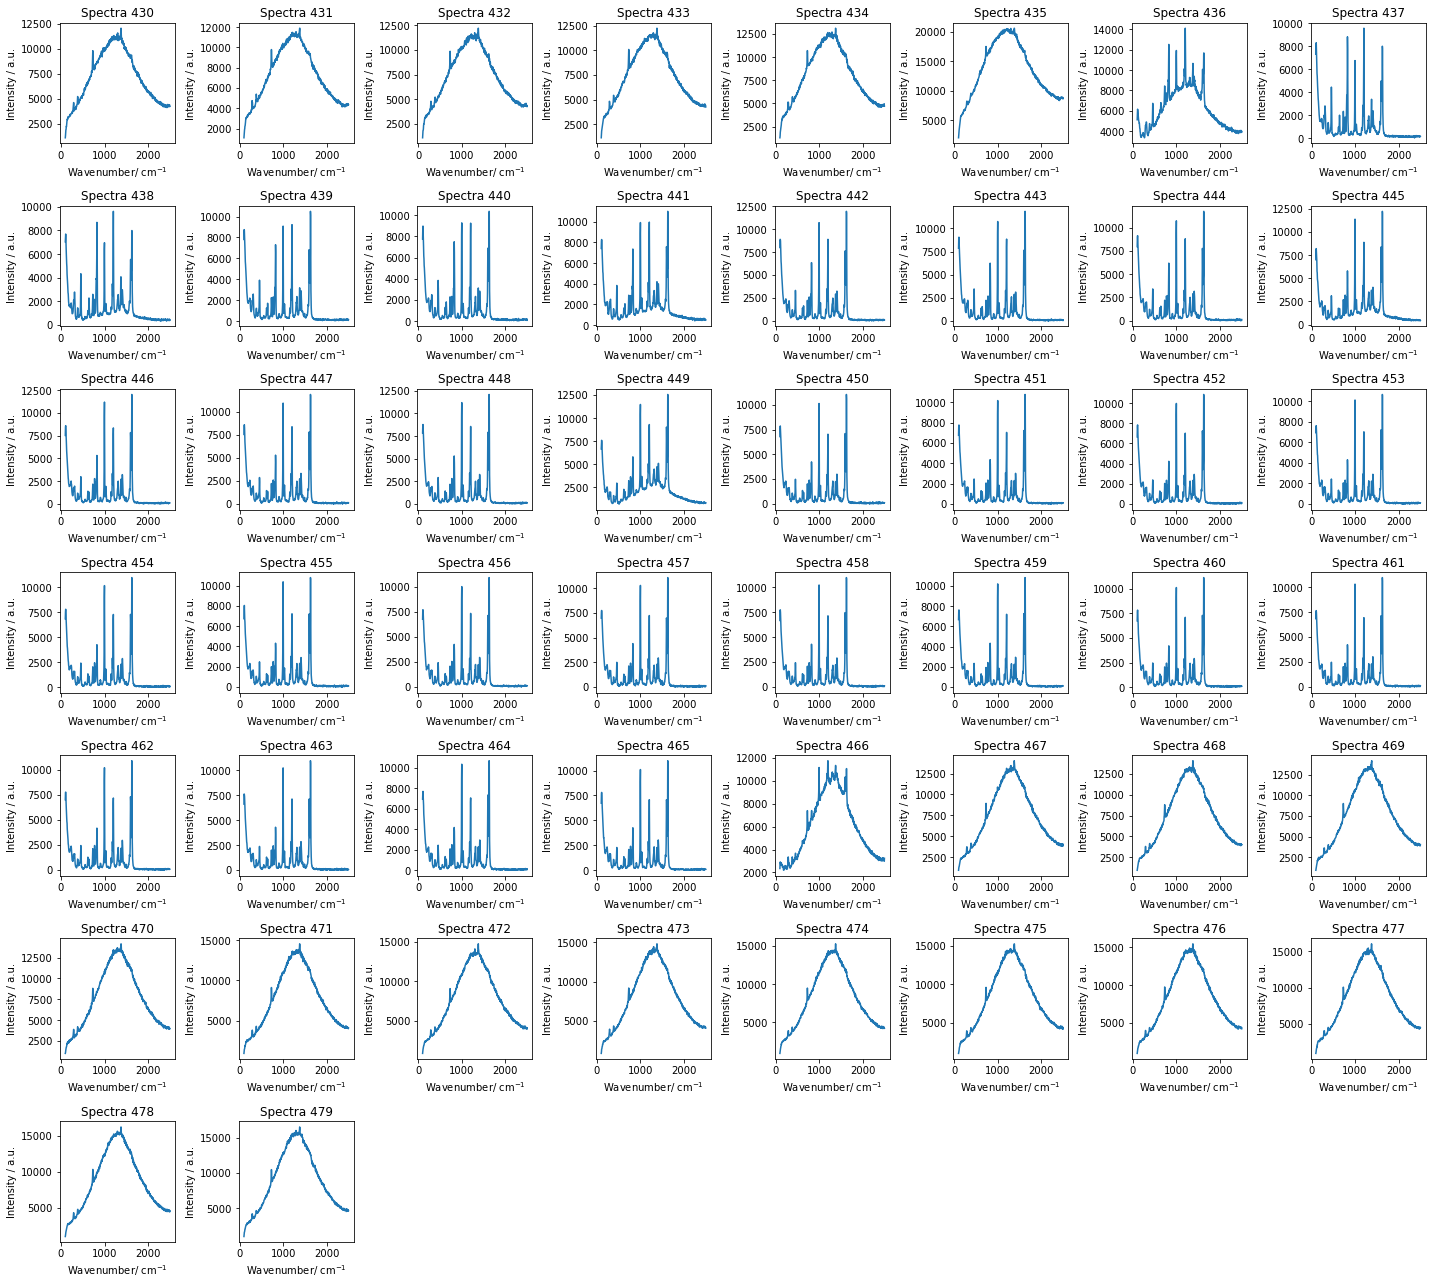

In [39]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(430, 480):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-429))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [40]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = df.loc[451:460, :]
condition7_ss.insert(loc = 0, column = 'Condition', value = 'C10_R1')
condition7_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
451,C10_R1,6751.0,7578.0,7762.0,7285.0,6912.0,6215.0,5538.0,5134.0,4926.0,...,83.0,42.0,110.0,105.0,95.0,76.0,66.0,108.0,78.0,110.0
452,C10_R1,6650.0,7677.0,7841.0,7243.0,6750.0,6255.0,5626.0,5270.0,4889.0,...,78.0,67.0,93.0,90.0,130.0,100.0,93.0,108.0,27.0,132.0
453,C10_R1,6955.0,7564.0,7636.0,7143.0,6896.0,6297.0,5763.0,5174.0,4825.0,...,91.0,81.0,81.0,112.0,96.0,59.0,76.0,82.0,45.0,101.0
454,C10_R1,6842.0,7535.0,7804.0,7322.0,6991.0,6352.0,5708.0,5295.0,4905.0,...,34.0,48.0,104.0,85.0,103.0,90.0,64.0,99.0,5.0,90.0
455,C10_R1,6743.0,7597.0,8057.0,7318.0,6690.0,6415.0,5649.0,5258.0,4924.0,...,41.0,33.0,97.0,68.0,108.0,82.0,93.0,104.0,89.0,93.0
456,C10_R1,6764.0,7721.0,7709.0,7413.0,6784.0,6378.0,5884.0,5318.0,4870.0,...,58.0,64.0,63.0,93.0,80.0,122.0,82.0,87.0,54.0,81.0
457,C10_R1,6965.0,7613.0,7742.0,7512.0,6938.0,6237.0,5715.0,5277.0,4908.0,...,94.0,35.0,105.0,77.0,77.0,17.0,74.0,71.0,41.0,116.0
458,C10_R1,6672.0,7695.0,7742.0,7465.0,6740.0,6327.0,5590.0,5262.0,4979.0,...,43.0,86.0,72.0,68.0,82.0,108.0,56.0,111.0,31.0,105.0
459,C10_R1,6673.0,7512.0,7627.0,7495.0,6735.0,6246.0,5691.0,5265.0,4985.0,...,56.0,52.0,71.0,72.0,98.0,107.0,135.0,113.0,97.0,94.0
460,C10_R1,6743.0,7613.0,7844.0,7383.0,6871.0,6348.0,5508.0,5218.0,4981.0,...,73.0,50.0,120.0,78.0,122.0,128.0,74.0,102.0,58.0,79.0


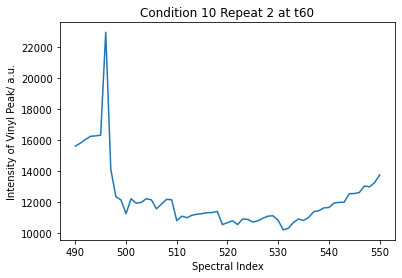

In [61]:
# Condition
df.loc[490:550,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 2 at t60')
plt.show()

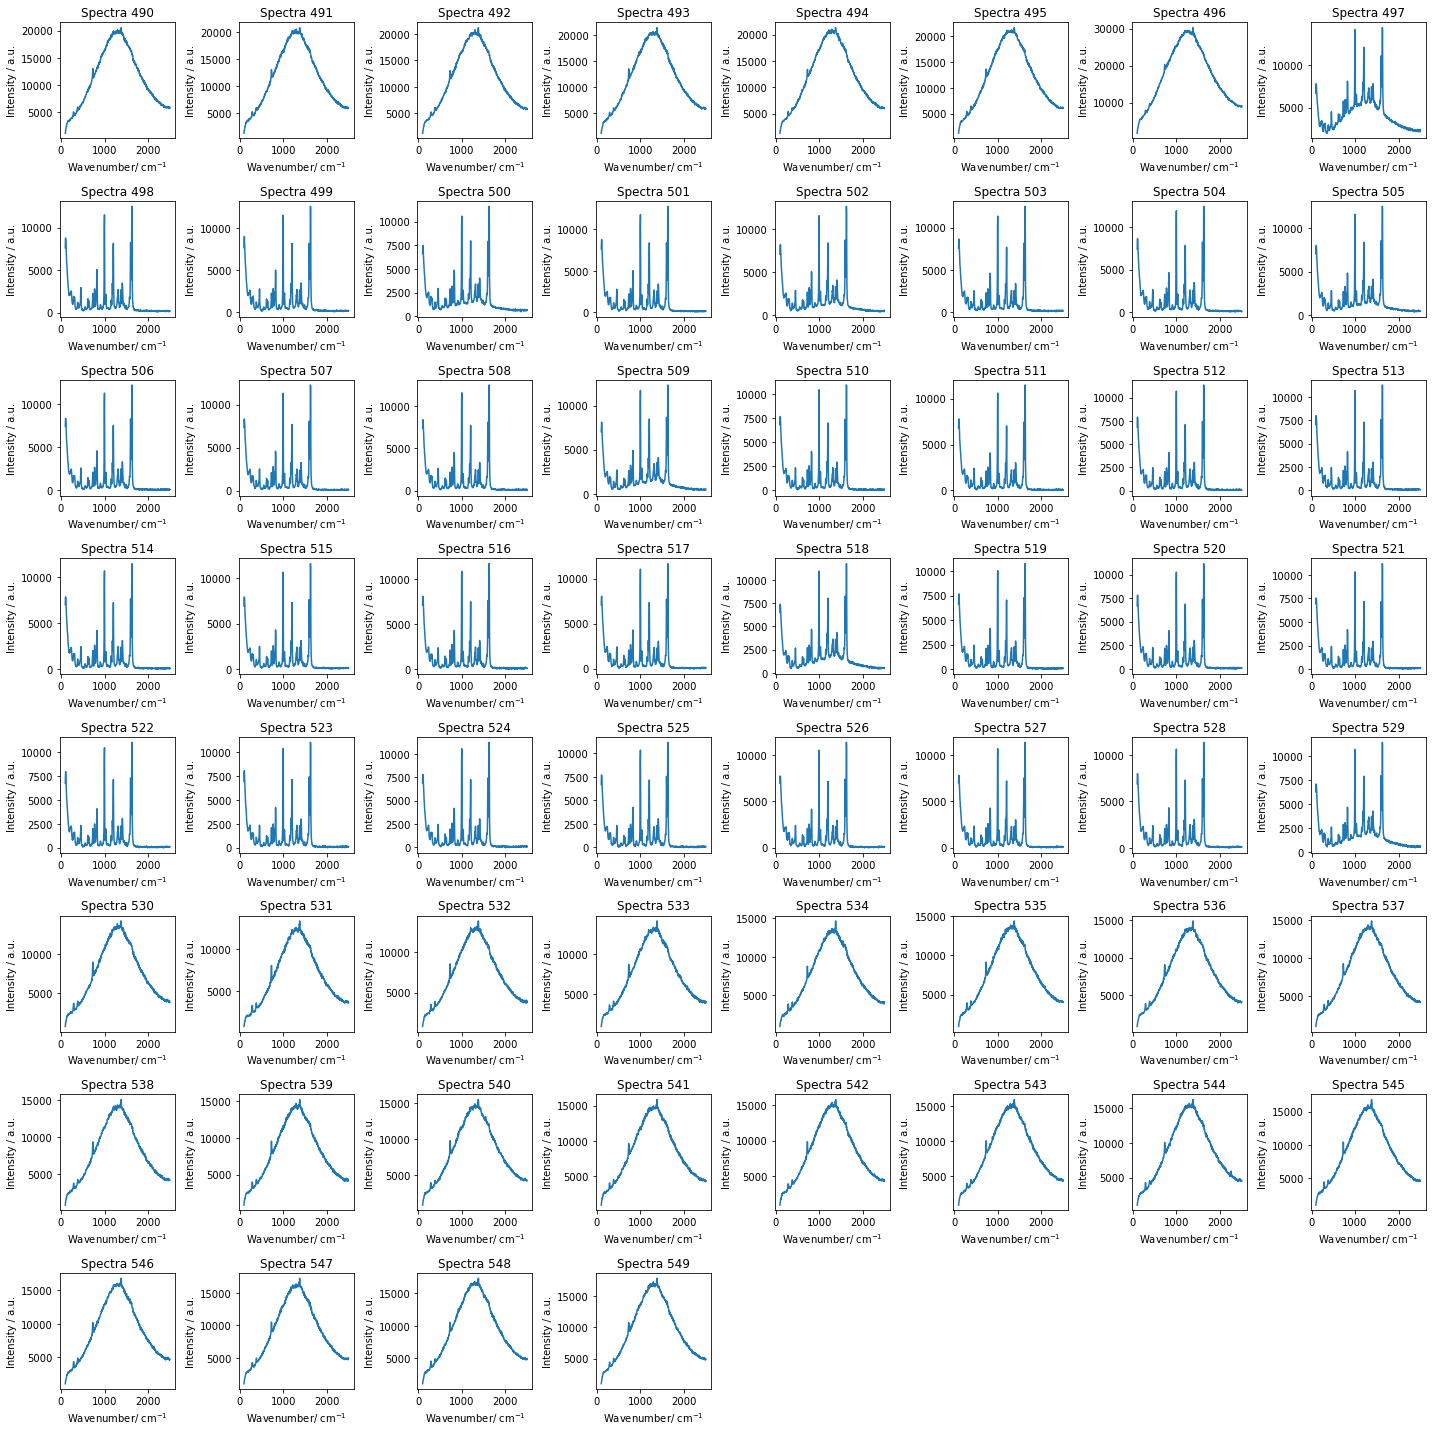

In [43]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(490, 550):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-489))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [45]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = df.loc[519:528, :]
condition8_ss.insert(loc = 0, column = 'Condition', value = 'C10_R2')
condition8_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
519,C10_R2,6634.0,7478.0,7680.0,7110.0,6558.0,6263.0,5420.0,5152.0,4682.0,...,40.0,90.0,95.0,75.0,84.0,96.0,120.0,66.0,45.0,96.0
520,C10_R2,6690.0,7498.0,7812.0,7421.0,6906.0,6286.0,5596.0,5303.0,4914.0,...,93.0,47.0,77.0,85.0,91.0,79.0,43.0,76.0,42.0,120.0
521,C10_R2,6935.0,7493.0,7541.0,7379.0,6865.0,6325.0,5593.0,5306.0,4936.0,...,92.0,70.0,73.0,126.0,103.0,129.0,73.0,94.0,51.0,107.0
522,C10_R2,6747.0,7633.0,7933.0,7320.0,6785.0,6264.0,5763.0,5095.0,4927.0,...,93.0,32.0,80.0,122.0,77.0,92.0,59.0,76.0,54.0,110.0
523,C10_R2,6965.0,7756.0,8079.0,7483.0,6817.0,6382.0,5873.0,5155.0,4838.0,...,61.0,47.0,124.0,90.0,106.0,76.0,50.0,96.0,64.0,110.0
524,C10_R2,6879.0,7799.0,7770.0,7631.0,6805.0,6532.0,5776.0,5384.0,4934.0,...,57.0,88.0,50.0,109.0,85.0,81.0,30.0,58.0,7.0,105.0
525,C10_R2,6688.0,7611.0,7700.0,7378.0,6777.0,6315.0,5601.0,5309.0,4986.0,...,51.0,63.0,140.0,107.0,58.0,94.0,71.0,75.0,49.0,85.0
526,C10_R2,6953.0,7722.0,7654.0,7661.0,6868.0,6418.0,5835.0,5413.0,4831.0,...,38.0,67.0,77.0,81.0,113.0,80.0,14.0,52.0,37.0,96.0
527,C10_R2,6992.0,7576.0,7777.0,7568.0,6860.0,6420.0,5763.0,5210.0,5047.0,...,17.0,62.0,68.0,108.0,72.0,84.0,114.0,44.0,21.0,87.0
528,C10_R2,6915.0,7833.0,8005.0,7475.0,6937.0,6362.0,5611.0,5369.0,5042.0,...,57.0,105.0,72.0,95.0,106.0,105.0,123.0,91.0,42.0,89.0


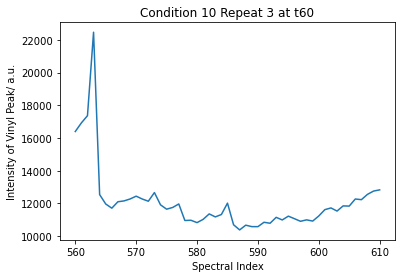

In [60]:
# Condition
df.loc[560:610,'1629.625579'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 10 Repeat 3 at t60')
plt.show()

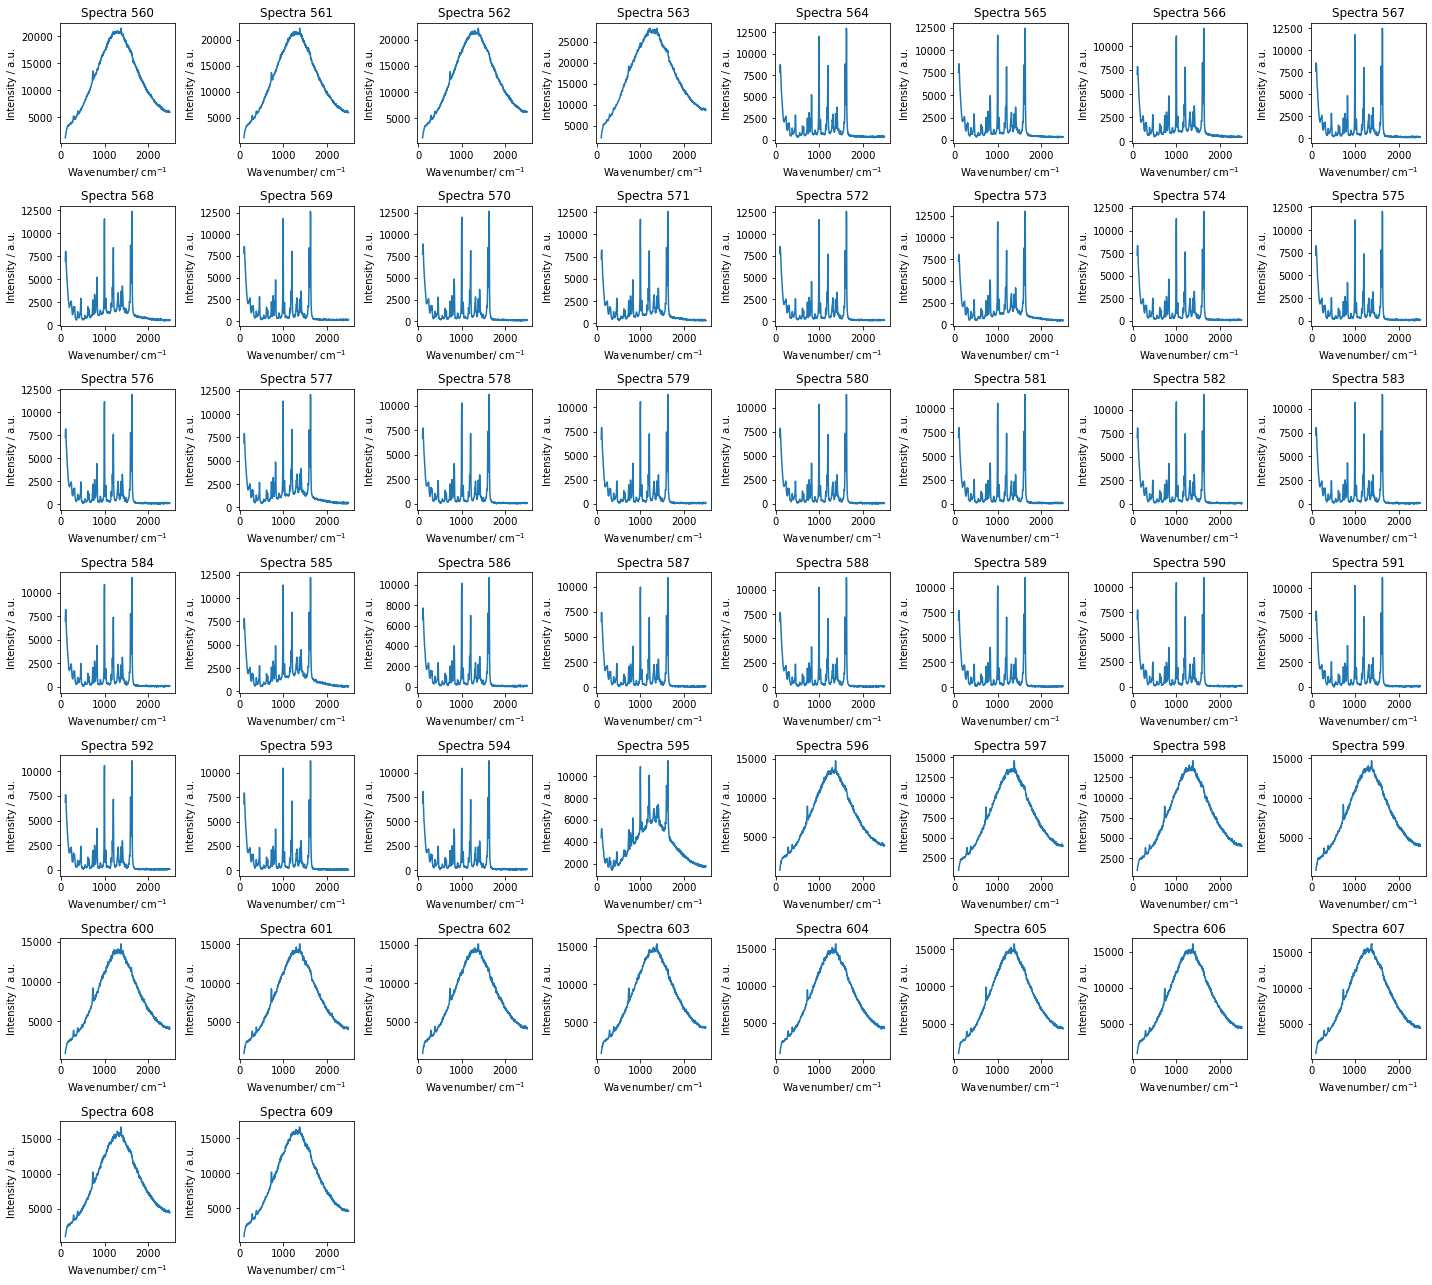

In [48]:
# Plot all spectra within condition 
plt.figure(figsize = (20,20))
for i in range(560, 610):
    y = df.loc[i,:]
    y.index = y.index.astype('float')
    plt.subplot(8,8,(i-559))
    plt.xlabel('Wavenumber/ cm$^{-1}$')
    plt.ylabel('Intensity / a.u.')
    plt.title('Spectra ' + str(i))
    y.plot()
    
plt.tight_layout()
plt.show()

In [49]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = df.loc[586:593, :]
condition9_ss.insert(loc = 0, column = 'Condition', value = 'C10_R3')
condition9_ss

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
586,C10_R3,6585.0,7449.0,7715.0,7325.0,6612.0,6230.0,5632.0,5213.0,4790.0,...,85.0,56.0,114.0,68.0,166.0,94.0,128.0,55.0,60.0,106.0
587,C10_R3,6564.0,7395.0,7455.0,7099.0,6568.0,6138.0,5571.0,5055.0,4685.0,...,52.0,85.0,60.0,114.0,98.0,71.0,70.0,94.0,63.0,76.0
588,C10_R3,6730.0,7561.0,7689.0,7170.0,6722.0,6195.0,5510.0,5162.0,4849.0,...,26.0,92.0,54.0,137.0,84.0,120.0,64.0,99.0,62.0,85.0
589,C10_R3,6731.0,7661.0,7695.0,7456.0,6698.0,6176.0,5447.0,5250.0,4918.0,...,53.0,110.0,31.0,64.0,124.0,89.0,51.0,56.0,62.0,86.0
590,C10_R3,6820.0,7337.0,7710.0,7322.0,6763.0,6264.0,5608.0,5289.0,4829.0,...,69.0,85.0,120.0,96.0,89.0,74.0,112.0,120.0,28.0,136.0
591,C10_R3,6758.0,7622.0,7692.0,7396.0,6781.0,6448.0,5682.0,5331.0,4825.0,...,18.0,36.0,106.0,56.0,138.0,112.0,69.0,122.0,27.0,128.0
592,C10_R3,6851.0,7606.0,7614.0,7475.0,6809.0,6325.0,5447.0,5114.0,4940.0,...,113.0,82.0,119.0,95.0,130.0,103.0,87.0,87.0,46.0,72.0
593,C10_R3,6818.0,7594.0,7948.0,7520.0,6742.0,6425.0,5843.0,5234.0,5096.0,...,84.0,34.0,86.0,113.0,108.0,130.0,95.0,85.0,57.0,34.0


In [50]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
46,C1_R1,6152.0,6682.0,6973.0,6411.0,5979.0,5600.0,4781.0,4431.0,4327.0,...,82.0,66.0,41.0,72.0,103.0,91.0,97.0,61.0,38.0,67.0
47,C1_R1,5905.0,6685.0,6982.0,6637.0,5899.0,5448.0,4798.0,4293.0,4086.0,...,21.0,37.0,71.0,63.0,90.0,104.0,84.0,47.0,79.0,104.0
48,C1_R1,6160.0,6755.0,6951.0,6411.0,5828.0,5404.0,4894.0,4524.0,4116.0,...,70.0,56.0,69.0,74.0,134.0,109.0,30.0,103.0,31.0,65.0
49,C1_R1,6279.0,6740.0,6922.0,6602.0,5940.0,5403.0,4795.0,4327.0,4010.0,...,79.0,96.0,62.0,52.0,112.0,95.0,89.0,125.0,43.0,91.0
50,C1_R1,6151.0,6855.0,6820.0,6528.0,5928.0,5476.0,4802.0,4296.0,4064.0,...,50.0,87.0,66.0,82.0,128.0,99.0,54.0,97.0,71.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,C10_R3,6731.0,7661.0,7695.0,7456.0,6698.0,6176.0,5447.0,5250.0,4918.0,...,53.0,110.0,31.0,64.0,124.0,89.0,51.0,56.0,62.0,86.0
590,C10_R3,6820.0,7337.0,7710.0,7322.0,6763.0,6264.0,5608.0,5289.0,4829.0,...,69.0,85.0,120.0,96.0,89.0,74.0,112.0,120.0,28.0,136.0
591,C10_R3,6758.0,7622.0,7692.0,7396.0,6781.0,6448.0,5682.0,5331.0,4825.0,...,18.0,36.0,106.0,56.0,138.0,112.0,69.0,122.0,27.0,128.0
592,C10_R3,6851.0,7606.0,7614.0,7475.0,6809.0,6325.0,5447.0,5114.0,4940.0,...,113.0,82.0,119.0,95.0,130.0,103.0,87.0,87.0,46.0,72.0


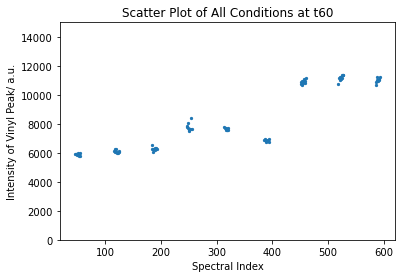

In [59]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t60')
plt.ylim(0, 15000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [64]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [65]:
# Inspect df_.
df_

,Condition,99.626030,104.137245,108.646280,113.151013,117.653571,122.153957,126.650050,131.141856,135.635735,...,2470.287077,2473.451562,2476.614819,2479.775228,2482.936030,2486.095606,2489.252338,2492.409464,2495.563749,2498.713580
46,C1_R1,6152.0,6682.0,6973.0,6411.0,5979.0,5600.0,4781.0,4431.0,4327.0,...,82.0,66.0,41.0,72.0,103.0,91.0,97.0,61.0,38.0,67.0
47,C1_R1,5905.0,6685.0,6982.0,6637.0,5899.0,5448.0,4798.0,4293.0,4086.0,...,21.0,37.0,71.0,63.0,90.0,104.0,84.0,47.0,79.0,104.0
48,C1_R1,6160.0,6755.0,6951.0,6411.0,5828.0,5404.0,4894.0,4524.0,4116.0,...,70.0,56.0,69.0,74.0,134.0,109.0,30.0,103.0,31.0,65.0
49,C1_R1,6279.0,6740.0,6922.0,6602.0,5940.0,5403.0,4795.0,4327.0,4010.0,...,79.0,96.0,62.0,52.0,112.0,95.0,89.0,125.0,43.0,91.0
50,C1_R1,6151.0,6855.0,6820.0,6528.0,5928.0,5476.0,4802.0,4296.0,4064.0,...,50.0,87.0,66.0,82.0,128.0,99.0,54.0,97.0,71.0,132.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,C10_R3,6731.0,7661.0,7695.0,7456.0,6698.0,6176.0,5447.0,5250.0,4918.0,...,53.0,110.0,31.0,64.0,124.0,89.0,51.0,56.0,62.0,86.0
590,C10_R3,6820.0,7337.0,7710.0,7322.0,6763.0,6264.0,5608.0,5289.0,4829.0,...,69.0,85.0,120.0,96.0,89.0,74.0,112.0,120.0,28.0,136.0
591,C10_R3,6758.0,7622.0,7692.0,7396.0,6781.0,6448.0,5682.0,5331.0,4825.0,...,18.0,36.0,106.0,56.0,138.0,112.0,69.0,122.0,27.0,128.0
592,C10_R3,6851.0,7606.0,7614.0,7475.0,6809.0,6325.0,5447.0,5114.0,4940.0,...,113.0,82.0,119.0,95.0,130.0,103.0,87.0,87.0,46.0,72.0


In [66]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.625579']].groupby('Condition').describe()

1629.625579                                                     \
                count       mean         std      min       25%      50%   
Condition                                                                  
C10_R1           10.0  10665.400  128.054849  10404.0  10619.75  10680.0   
C10_R2           10.0  10770.400  176.674968  10527.0  10661.00  10771.0   
C10_R3            8.0  10708.375  227.343628  10377.0  10577.75  10680.0   
C19_R1           10.0   7820.400  278.491652   7579.0   7699.00   7726.0   
C19_R2            8.0   7634.500  175.333967   7440.0   7473.50   7592.0   
C19_R3           10.0   6768.200   54.923786   6667.0   6742.00   6784.0   
C1_R1            10.0   5948.200   86.544529   5815.0   5897.00   5932.0   
C1_R2            10.0   6161.000  110.603396   5917.0   6128.75   6170.0   
C1_R3            10.0   6260.600   43.182301   6194.0   6232.50   6258.5   

                              
                75%      max  
Condition                     
C10_R1     10721.75  10839.0  
C10_R2     10881.75  11072.0  
C10_R3     10799.75  11146.0  
C19_R1      7756.00   8528.0  
C19_R2      7829.25   7841.0  
C19_R3      6810.00   6831.0  
C1_R1       6014.50   6097.0  
C1_R2       6197.75   6350.0  
C1_R3       6283.25   6330.0

In [67]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\210224 High Throughput Experiment Conditions 1, 19 and 10 Repeat\Raman\df_t60.csv')